https://blog.csdn.net/frighting_ing/article/details/120789556?spm=1001.2101.3001.6650.2&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-2-120789556-blog-109686474.t0_edu_mix&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-2-120789556-blog-109686474.t0_edu_mix&utm_relevant_index=3

0 0.824383020401001
10 0.9097442030906677
20 0.820074737071991
30 0.8754221200942993
40 0.8733181357383728
50 0.8990052342414856
60 0.9233669638633728
70 0.837648332118988
80 0.8894933462142944
90 0.9124306440353394


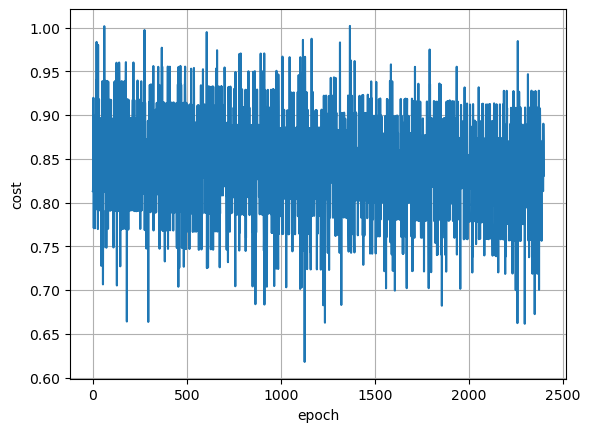

In [48]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class DiabetesDataset(Dataset):
    def __init__(self,filepath):
        xy = np.loadtxt(filepath,delimiter = ',',dtype = np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

    
dataset = DiabetesDataset('diabetes.csv.gz')
train_loader = DataLoader(dataset = dataset, batch_size = 32, shuffle = True)


class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

     
model = Model()
loss_list = []

criterion = torch.nn.BCELoss(reduction = 'mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

if __name__ == '__main__':
    for epoch in range(100):
        for i, data in enumerate(train_loader, 0): #enumerate可以获得当前迭代次数
            inputs, labels = data
            y_pred = model(inputs)
            loss = criterion(y_pred, labels)
            loss_list.append(loss.item())
            
        if epoch % 10 == 0:
            print(epoch, loss.item())
                
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()

plt.plot(loss_list)
plt.grid(True)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()